# iGEDS

Este notebook está basado en el trabajo de Miguel Nuñez, el cual contiene los datos originados por la iniciativa iGEDS y:
*   Re-escalan todas las métricas a valores entre 1-5 
*   Imputan valores faltantes para algunos paises 
*   Visualiza la distribución de las métricas por país.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! pip install pingouin

Primeras 5 entradas de los datos originales:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/NunezKant/iGEDS/master/iEcosystems%20v3.csv', decimal=",")
df.head(25)

,Pillar,Metrics,México,Argentina,Chile,Brasil,España,Uruguay,Worst performance (1),Frontier (5),Type
0,1 Foundational Institutions,1.01 Ease of doing business (WB),72.40,59.00,72.60,59.10,77.90,61.50,0.00,1.000000e+02,Positive
1,1 Foundational Institutions,1.02 Starting a business (WB),86.10,80.40,91.40,81.30,86.90,89.60,0.00,1.000000e+02,Positive
2,1 Foundational Institutions,1.03 Paying taxes (WB),65.80,49.30,75.30,34.40,84.70,70.30,0.00,1.000000e+02,Positive
3,1 Foundational Institutions,1.04 Resolving Insolvency (WB),70.30,40.00,60.10,50.40,79.20,53.60,0.00,1.000000e+02,Positive
4,1 Foundational Institutions,1.05 Enforcing contracts (WB),67.00,57.50,64.70,64.10,70.90,56.30,0.00,1.000000e+02,Positive
5,1 Foundational Institutions,1.06 Property Rights (IEF),58.30,50.50,69.90,57.30,74.90,72.00,0.00,1.000000e+02,Positive
6,1 Foundational Institutions,1.07 Government Integrity (IEF),36.70,49.70,73.40,45.60,55.10,73.50,0.00,1.000000e+02,Positive
7,1 Foundational Institutions,1.08 Labor Freedom (IEF),58.40,46.50,64.70,49.50,57.70,71.00,0.00,1.000000e+02,Positive
8,1 Foundational Institutions,1.09 Trade freedom (IEF),87.60,69.20,89.00,67.80,86.40,77.40,0.00,1.000000e+02,Positive
9,1 Foundational Institutions,1.10 Corruption Perceptions Index (TI),28.00,40.00,67.00,35.00,58.00,70.00,0.00,1.000000e+02,Positive


Proceso de re-escalamiento:

In [4]:
all_columns = df.columns.values.tolist()
metrics = ["Metrics","México","Argentina","Chile","Brasil","España","Uruguay"]
df_metrics = df[metrics]
df_pilars = df[["Pillar","Type"]]
column_names = df["Metrics"].values
df_metrics = df_metrics.T
df_metrics.columns = column_names
df_metrics.drop("Metrics", axis = 0, inplace = True)
for col,val1,val2 in zip(df_metrics.columns, df['Worst performance (1)'],df['Frontier (5)']):
    df_metrics[col] = df_metrics[col].apply(lambda x: (x-val1)/(val2-val1))

df_metrics = np.round((df_metrics*4)+1,2)

El siguiente DataFrame contiene los datos re-escalados del 1-5, sin embargo algunas entradas siguen teniendo valores faltantes, dichos valores se van a inferir con la técnica de **K-vecinos cercanos**.

In [5]:
df_metrics

,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),1.10 Corruption Perceptions Index (TI),...,5.02 Social Progress Index,5.03 Inclusive Development Index,5.04 Population below international poverty line (SDG 1 - No poverty),5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger),5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth),5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),"5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)",5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities),5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities),5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)
México,3.90,4.44,3.63,3.81,3.68,3.33,2.47,3.34,4.50,2.12,...,3.82,3.08,4.80,4.88,3.34,4.72,4.33,4.52,4.32,1.71
Argentina,3.36,4.22,2.97,2.60,3.30,3.02,2.99,2.86,3.77,2.60,...,4.07,3.09,4.97,4.88,3.58,3.94,4.20,4.58,4.71,2.03
Chile,3.90,4.66,4.01,3.40,3.59,3.80,3.94,3.59,4.56,3.68,...,4.20,3.29,4.94,4.93,3.32,4.16,4.29,4.84,4.28,5.00
Brasil,3.36,4.25,2.38,3.02,3.56,3.29,2.82,2.98,3.71,2.40,...,3.91,2.95,4.61,5.00,3.22,3.26,4.60,4.51,4.73,2.18
España,4.12,4.48,4.39,4.17,3.84,4.00,3.20,3.31,4.46,3.32,...,4.50,3.27,4.92,5.00,3.82,2.57,4.56,4.90,4.82,1.68
Uruguay,3.46,4.58,3.81,3.14,3.25,3.88,3.94,3.84,4.10,3.80,...,4.11,3.31,4.99,5.00,3.67,4.02,4.87,NaN,4.87,4.32


Total de valores faltantes:
* Brasil tiene 2 valores faltantes, por 1 de chile y de argentina

In [6]:
df.isnull().sum()

Pillar                   0
Metrics                  0
México                   0
Argentina                1
Chile                    1
Brasil                   2
España                   0
Uruguay                  3
Worst performance (1)    0
Frontier (5)             0
Type                     0
dtype: int64

Se van a rellenar los valores faltantes con la media de los 3 vecinos más cercanos al país, la distancia entre los países la dictan los valores que tienen en cada métrica.

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
var = imputer.fit_transform(df_metrics)
df_imputed = pd.DataFrame(var)
df_imputed.columns = column_names
df_imputed.index = df_metrics.index
#df_imputed.head(6)
df_imputed

,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),1.10 Corruption Perceptions Index (TI),...,5.02 Social Progress Index,5.03 Inclusive Development Index,5.04 Population below international poverty line (SDG 1 - No poverty),5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger),5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth),5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),"5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)",5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities),5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities),5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)
México,3.90,4.44,3.63,3.81,3.68,3.33,2.47,3.34,4.50,2.12,...,3.82,3.08,4.80,4.88,3.34,4.72,4.33,4.520000,4.32,1.71
Argentina,3.36,4.22,2.97,2.60,3.30,3.02,2.99,2.86,3.77,2.60,...,4.07,3.09,4.97,4.88,3.58,3.94,4.20,4.580000,4.71,2.03
Chile,3.90,4.66,4.01,3.40,3.59,3.80,3.94,3.59,4.56,3.68,...,4.20,3.29,4.94,4.93,3.32,4.16,4.29,4.840000,4.28,5.00
Brasil,3.36,4.25,2.38,3.02,3.56,3.29,2.82,2.98,3.71,2.40,...,3.91,2.95,4.61,5.00,3.22,3.26,4.60,4.510000,4.73,2.18
España,4.12,4.48,4.39,4.17,3.84,4.00,3.20,3.31,4.46,3.32,...,4.50,3.27,4.92,5.00,3.82,2.57,4.56,4.900000,4.82,1.68
Uruguay,3.46,4.58,3.81,3.14,3.25,3.88,3.94,3.84,4.10,3.80,...,4.11,3.31,4.99,5.00,3.67,4.02,4.87,4.643333,4.87,4.32


Se concatenan los nombres de los pilares y del tipo de relación que tiene la variable, este df servirá para obtener las correlaciones.

In [8]:
df_concat = pd.concat([df_pilars,df_imputed.T.reset_index()], axis = 1).rename(columns={'index':'Metrics'})
df_concat

,Pillar,Type,Metrics,México,Argentina,Chile,Brasil,España,Uruguay
0,1 Foundational Institutions,Positive,1.01 Ease of doing business (WB),3.90,3.36,3.90,3.36,4.12,3.460000
1,1 Foundational Institutions,Positive,1.02 Starting a business (WB),4.44,4.22,4.66,4.25,4.48,4.580000
2,1 Foundational Institutions,Positive,1.03 Paying taxes (WB),3.63,2.97,4.01,2.38,4.39,3.810000
3,1 Foundational Institutions,Positive,1.04 Resolving Insolvency (WB),3.81,2.60,3.40,3.02,4.17,3.140000
4,1 Foundational Institutions,Positive,1.05 Enforcing contracts (WB),3.68,3.30,3.59,3.56,3.84,3.250000
...,...,...,...,...,...,...,...,...,...
56,5 Impact,Negative,5.07 Unemployment rate of population 15 years ...,4.72,3.94,4.16,3.26,2.57,4.020000
57,5 Impact,Negative,5.08 Carbon dioxide emissions per unit of GDP ...,4.33,4.20,4.29,4.60,4.56,4.870000
58,5 Impact,Negative,5.09 Proportion of urban population living in ...,4.52,4.58,4.84,4.51,4.90,4.643333
59,5 Impact,Negative,5.10 Annual population-weighted average mean c...,4.32,4.71,4.28,4.73,4.82,4.870000


In [9]:
df_concat.drop('Type',axis=1,inplace = True)
df_concat

,Pillar,Metrics,México,Argentina,Chile,Brasil,España,Uruguay
0,1 Foundational Institutions,1.01 Ease of doing business (WB),3.90,3.36,3.90,3.36,4.12,3.460000
1,1 Foundational Institutions,1.02 Starting a business (WB),4.44,4.22,4.66,4.25,4.48,4.580000
2,1 Foundational Institutions,1.03 Paying taxes (WB),3.63,2.97,4.01,2.38,4.39,3.810000
3,1 Foundational Institutions,1.04 Resolving Insolvency (WB),3.81,2.60,3.40,3.02,4.17,3.140000
4,1 Foundational Institutions,1.05 Enforcing contracts (WB),3.68,3.30,3.59,3.56,3.84,3.250000
...,...,...,...,...,...,...,...,...
56,5 Impact,5.07 Unemployment rate of population 15 years ...,4.72,3.94,4.16,3.26,2.57,4.020000
57,5 Impact,5.08 Carbon dioxide emissions per unit of GDP ...,4.33,4.20,4.29,4.60,4.56,4.870000
58,5 Impact,5.09 Proportion of urban population living in ...,4.52,4.58,4.84,4.51,4.90,4.643333
59,5 Impact,5.10 Annual population-weighted average mean c...,4.32,4.71,4.28,4.73,4.82,4.870000


Por último se obtiene el **tidy** dataframe, el cuál contiene:
una carácteristica por columna y una observación por fila.

In [10]:
final_df = pd.melt(df_concat,id_vars=['Pillar','Metrics'],value_vars=["México","Argentina","Chile","Brasil","España",'Uruguay'],value_name="Value",var_name="Country")
final_df

,Pillar,Metrics,Country,Value
0,1 Foundational Institutions,1.01 Ease of doing business (WB),México,3.900000
1,1 Foundational Institutions,1.02 Starting a business (WB),México,4.440000
2,1 Foundational Institutions,1.03 Paying taxes (WB),México,3.630000
3,1 Foundational Institutions,1.04 Resolving Insolvency (WB),México,3.810000
4,1 Foundational Institutions,1.05 Enforcing contracts (WB),México,3.680000
...,...,...,...,...
361,5 Impact,5.07 Unemployment rate of population 15 years ...,Uruguay,4.020000
362,5 Impact,5.08 Carbon dioxide emissions per unit of GDP ...,Uruguay,4.870000
363,5 Impact,5.09 Proportion of urban population living in ...,Uruguay,4.643333
364,5 Impact,5.10 Annual population-weighted average mean c...,Uruguay,4.870000


Ya tenemos los datos limpios, re-escalados, sin valores faltantes y con todas las métricas en 'positivo' ahora podemos empezar a hacer visualizaciones y obtener información del set de datos.

vamos a obtener la media por pilar de cada país para obtener la matriz de correlación.

In [11]:
corr =df_concat.groupby('Pillar').mean().T.corr()

Nos interesa como se relacionan las métricas con las variables de salida:


*   4 Comparative Advantage
*   5 Impact



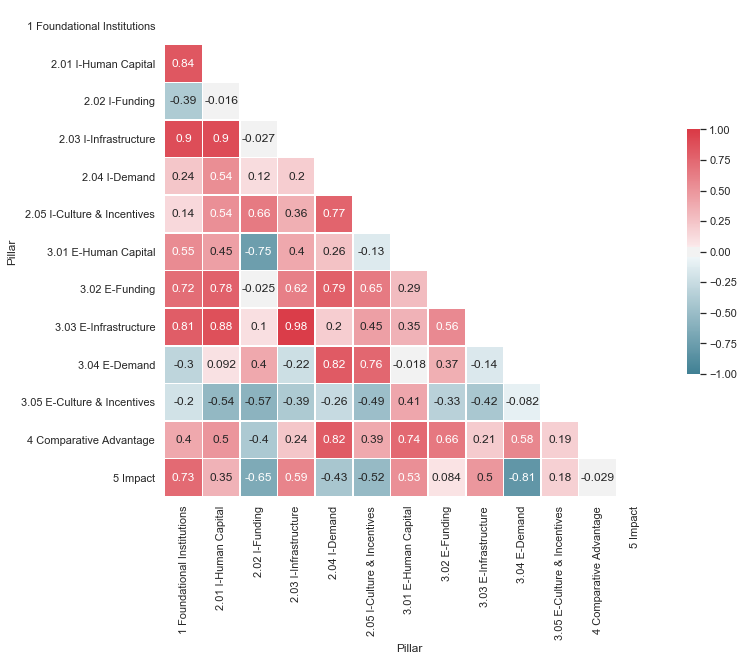

In [12]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
df_means = df_concat.groupby('Pillar').mean().T

In [14]:
import pingouin as pg

In [15]:
df_means.rcorr()

Pillar,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Impact
Pillar,,,,,,,,,,,,,
1 Foundational Institutions,-,*,,*,,,,,,,,,
2.01 I-Human Capital,0.84,-,,*,,,,,*,,,,
2.02 I-Funding,-0.388,-0.016,-,,,,,,,,,,
2.03 I-Infrastructure,0.896,0.903,-0.027,-,,,,,***,,,,
2.04 I-Demand,0.241,0.544,0.118,0.201,-,,,,,*,,*,
2.05 I-Culture & Incentives,0.14,0.537,0.655,0.361,0.77,-,,,,,,,
3.01 E-Human Capital,0.555,0.451,-0.748,0.401,0.262,-0.128,-,,,,,,
3.02 E-Funding,0.719,0.784,-0.025,0.622,0.79,0.65,0.294,-,,,,,
3.03 E-Infrastructure,0.806,0.881,0.105,0.984,0.201,0.446,0.351,0.563,-,,,,


In [67]:
#@title significance cheking { display-mode: "form" }
import scipy.stats as stats

def check_corr_significance(df1, df2, a, b):
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        return True, r[0]
    else:
        return False, 0


#print
def print_corr_significance(df, a, b):
    import scipy.stats as stats
    r = stats.pearsonr(df[a], df[b])
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    if r[1] < 0.05:
        print('*Statistically significant*')
        print('**********************************************')
        print('')

        sns.lmplot(x=b, y=a, data=df)
        return True, r[0]
    else:
        print('Not significant')
        print('**********************************************')
        print('')

        sns.lmplot(x=b, y=a, data=df)
    return False, 0
  

In [40]:
check_corr_significance(df_means, df_means,'4 Comparative Advantage','2.04 I-Demand')

(True, 0.8184860452505838)

In [41]:
#@title Función de spider plot
def make_spider_comparison(df,country_name1,country_name2):
    from math import pi
    categories=list(df)
    N = len(categories)
  
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    fig = plt.figure(figsize=(8, 8))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
  
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories )
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4",""], color="grey", size=13)
    plt.ylim(0,5)
  
  
    # ------- PART 2: Add plots
  
    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
  
    # Ind1
    values=df.loc[country_name1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name1)
    ax.fill(angles, values, 'b', alpha=0.1)
  
    # Ind2
    values=df.loc[country_name2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name2)
    ax.fill(angles, values, 'r', alpha=0.1)
  
    # Add legend
    plt.legend( bbox_to_anchor=(0.05, 0.25))
    plt.tight_layout()

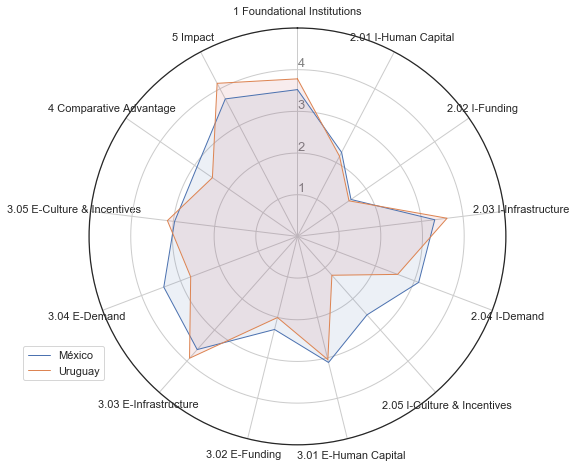

In [42]:
make_spider_comparison(df_means,'México','Uruguay')

In [43]:
#Graph_df = pd.read_csv('https://raw.githubusercontent.com/NunezKant/iGEDS/master/Graph_DF.csv')
Graph_df = pd.read_csv('https://raw.githubusercontent.com/OlgaMMC/iGED/master/Tidy_DataFrame.csv')
Graph_df

,Ciudad,País,avg strength,weight,Degree,Weighted Degree,Eccentricidad,Clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius
0,CABA,Argentina,3.244633,1.481579,4.385965,14.017544,4.798246,0.148791,6,3,3.355669,0.107392,0.325773,0.960807,5.333333,0.495614,0.251,1.868
1,CDMX,México,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940,7,4,3.820318,0.050000,0.289320,0.677149,1.000000,0.421405,0.202,1.910
2,Santiago de Chile,Chile,3.417211,1.462564,3.948718,13.764103,5.041026,0.134037,6,3,3.227544,0.100744,0.338889,0.906814,19.000000,0.430769,0.525,1.890
3,Montevideo,Uruguay,3.227742,2.749495,7.747475,25.939394,4.479798,0.207747,6,3,3.081116,0.224523,0.360837,1.274519,59.000000,0.565657,0.179,1.778
4,Madrid,España,3.518387,1.362343,3.790795,12.861925,6.079498,0.120510,8,5,3.783517,0.081917,0.294653,1.141033,14.000000,0.439331,0.184,1.920
5,Sao Paulo,Brasil,3.430669,1.253704,3.370370,11.694444,6.726852,0.129928,8,4,4.324031,0.078571,0.266719,1.211794,1.000000,0.421296,0.237,1.983


In [44]:
df_means.columns.name = ''
Graph_df.drop('Ciudad', axis = 1, inplace=True)
Graph_df.set_index('País',inplace=True)
Graph_df.index.name = ''

In [45]:
df_graph_ieco = pd.concat([df_means,Graph_df], axis = 1)
df_graph_ieco

,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Impact,avg strength,weight,Degree,Weighted Degree,Eccentricidad,Clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius
México,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,3.430,2.970000,2.93,3.725455,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940,7,4,3.820318,0.050000,0.289320,0.677149,1.000000,0.421405,0.202,1.910
Argentina,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,3.175,2.965000,2.58,3.781818,3.244633,1.481579,4.385965,14.017544,4.798246,0.148791,6,3,3.355669,0.107392,0.325773,0.960807,5.333333,0.495614,0.251,1.868
Chile,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,3.205,3.455000,3.11,4.091818,3.417211,1.462564,3.948718,13.764103,5.041026,0.134037,6,3,3.227544,0.100744,0.338889,0.906814,19.000000,0.430769,0.525,1.890
Brasil,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,3.460,3.438333,2.74,3.671818,3.430669,1.253704,3.370370,11.694444,6.726852,0.129928,8,4,4.324031,0.078571,0.266719,1.211794,1.000000,0.421296,0.237,1.983
España,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,3.365,2.626667,2.84,3.864545,3.518387,1.362343,3.790795,12.861925,6.079498,0.120510,8,5,3.783517,0.081917,0.294653,1.141033,14.000000,0.439331,0.184,1.920
Uruguay,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,2.740,3.143333,2.48,4.147576,3.227742,2.749495,7.747475,25.939394,4.479798,0.207747,6,3,3.081116,0.224523,0.360837,1.274519,59.000000,0.565657,0.179,1.778


In [46]:
ieco_global_corr_df=df_graph_ieco.corr()
pd.set_option("display.max_rows", None, "display.max_columns", None)
ieco_global_corr_df


,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Impact,avg strength,weight,Degree,Weighted Degree,Eccentricidad,Clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius
1 Foundational Institutions,1.000000,0.840274,-0.387851,0.896183,0.241385,0.139546,0.554805,0.719206,0.805614,-0.303465,-0.202260,0.398735,0.734565,0.282043,0.308403,0.270243,0.310834,-0.248765,0.119891,-0.101749,0.161879,-0.455479,0.256974,0.434262,0.057238,0.526316,0.073141,0.269750,-0.351757
2.01 I-Human Capital,0.840274,1.000000,-0.016269,0.903394,0.543974,0.536930,0.450810,0.784386,0.881426,0.092240,-0.537658,0.502177,0.346690,0.534109,-0.130836,-0.141129,-0.125112,0.006499,-0.220874,0.169760,0.490421,-0.199446,-0.155289,0.101512,-0.104863,0.089858,-0.221589,0.169749,-0.024491
2.02 I-Funding,-0.387851,-0.016269,1.000000,-0.027129,0.118169,0.655465,-0.747778,-0.024527,0.104712,0.403245,-0.570975,-0.400578,-0.654334,0.223853,-0.311220,-0.270942,-0.308998,0.599906,-0.154678,0.738507,0.700507,0.631247,-0.271756,-0.628286,0.373340,-0.360532,-0.117499,-0.729078,0.433691
2.03 I-Infrastructure,0.896183,0.903394,-0.027129,1.000000,0.200813,0.361486,0.401302,0.622296,0.983780,-0.219200,-0.393777,0.240741,0.594199,0.284460,0.179647,0.173931,0.185960,-0.098410,0.183639,0.093059,0.344736,-0.333786,0.214947,0.311748,0.292772,0.424835,0.078154,0.136180,-0.224541
2.04 I-Demand,0.241385,0.543974,0.118169,0.200813,1.000000,0.769945,0.261928,0.789663,0.200793,0.824475,-0.261821,0.818486,-0.425228,0.952116,-0.751303,-0.793035,-0.754032,0.599407,-0.917494,0.572974,0.699669,0.524572,-0.859276,-0.643838,-0.572032,-0.655476,-0.887074,0.141029,0.680817
2.05 I-Culture & Incentives,0.139546,0.536930,0.655465,0.361486,0.769945,1.000000,-0.127788,0.650216,0.445633,0.755668,-0.488842,0.393280,-0.515687,0.857667,-0.662882,-0.672317,-0.662394,0.804229,-0.625068,0.888503,0.959673,0.697266,-0.676164,-0.758020,-0.003378,-0.546784,-0.682121,-0.238643,0.724309
3.01 E-Human Capital,0.554805,0.450810,-0.747778,0.401302,0.261928,-0.127788,1.000000,0.293957,0.350612,-0.018325,0.410336,0.744662,0.532718,0.195607,-0.162089,-0.186376,-0.159617,-0.249372,-0.084146,-0.389230,-0.312157,-0.415086,-0.094667,0.364285,-0.318958,0.040981,-0.291201,0.945810,-0.022217
3.02 E-Funding,0.719206,0.784386,-0.024527,0.622296,0.789663,0.650216,0.293957,1.000000,0.562785,0.367181,-0.328157,0.661896,0.083729,0.833969,-0.228493,-0.290532,-0.231258,0.368028,-0.521533,0.474447,0.684601,0.216616,-0.370071,-0.276328,-0.229249,-0.064699,-0.506678,0.033279,0.262967
3.03 E-Infrastructure,0.805614,0.881426,0.104712,0.983780,0.200793,0.445633,0.350612,0.562785,1.000000,-0.141458,-0.415416,0.205646,0.496269,0.299964,0.083570,0.089014,0.090888,-0.004643,0.174842,0.180864,0.403944,-0.244251,0.156010,0.223271,0.360037,0.333943,0.033812,0.113457,-0.123385
3.04 E-Demand,-0.303465,0.092240,0.403245,-0.219200,0.824475,0.755668,-0.018325,0.367181,-0.141458,1.000000,-0.082412,0.580815,-0.808438,0.808841,-0.946369,-0.962625,-0.949642,0.828103,-0.898034,0.713290,0.646676,0.829891,-0.971257,-0.912145,-0.425708,-0.929991,-0.941366,0.036675,0.947550


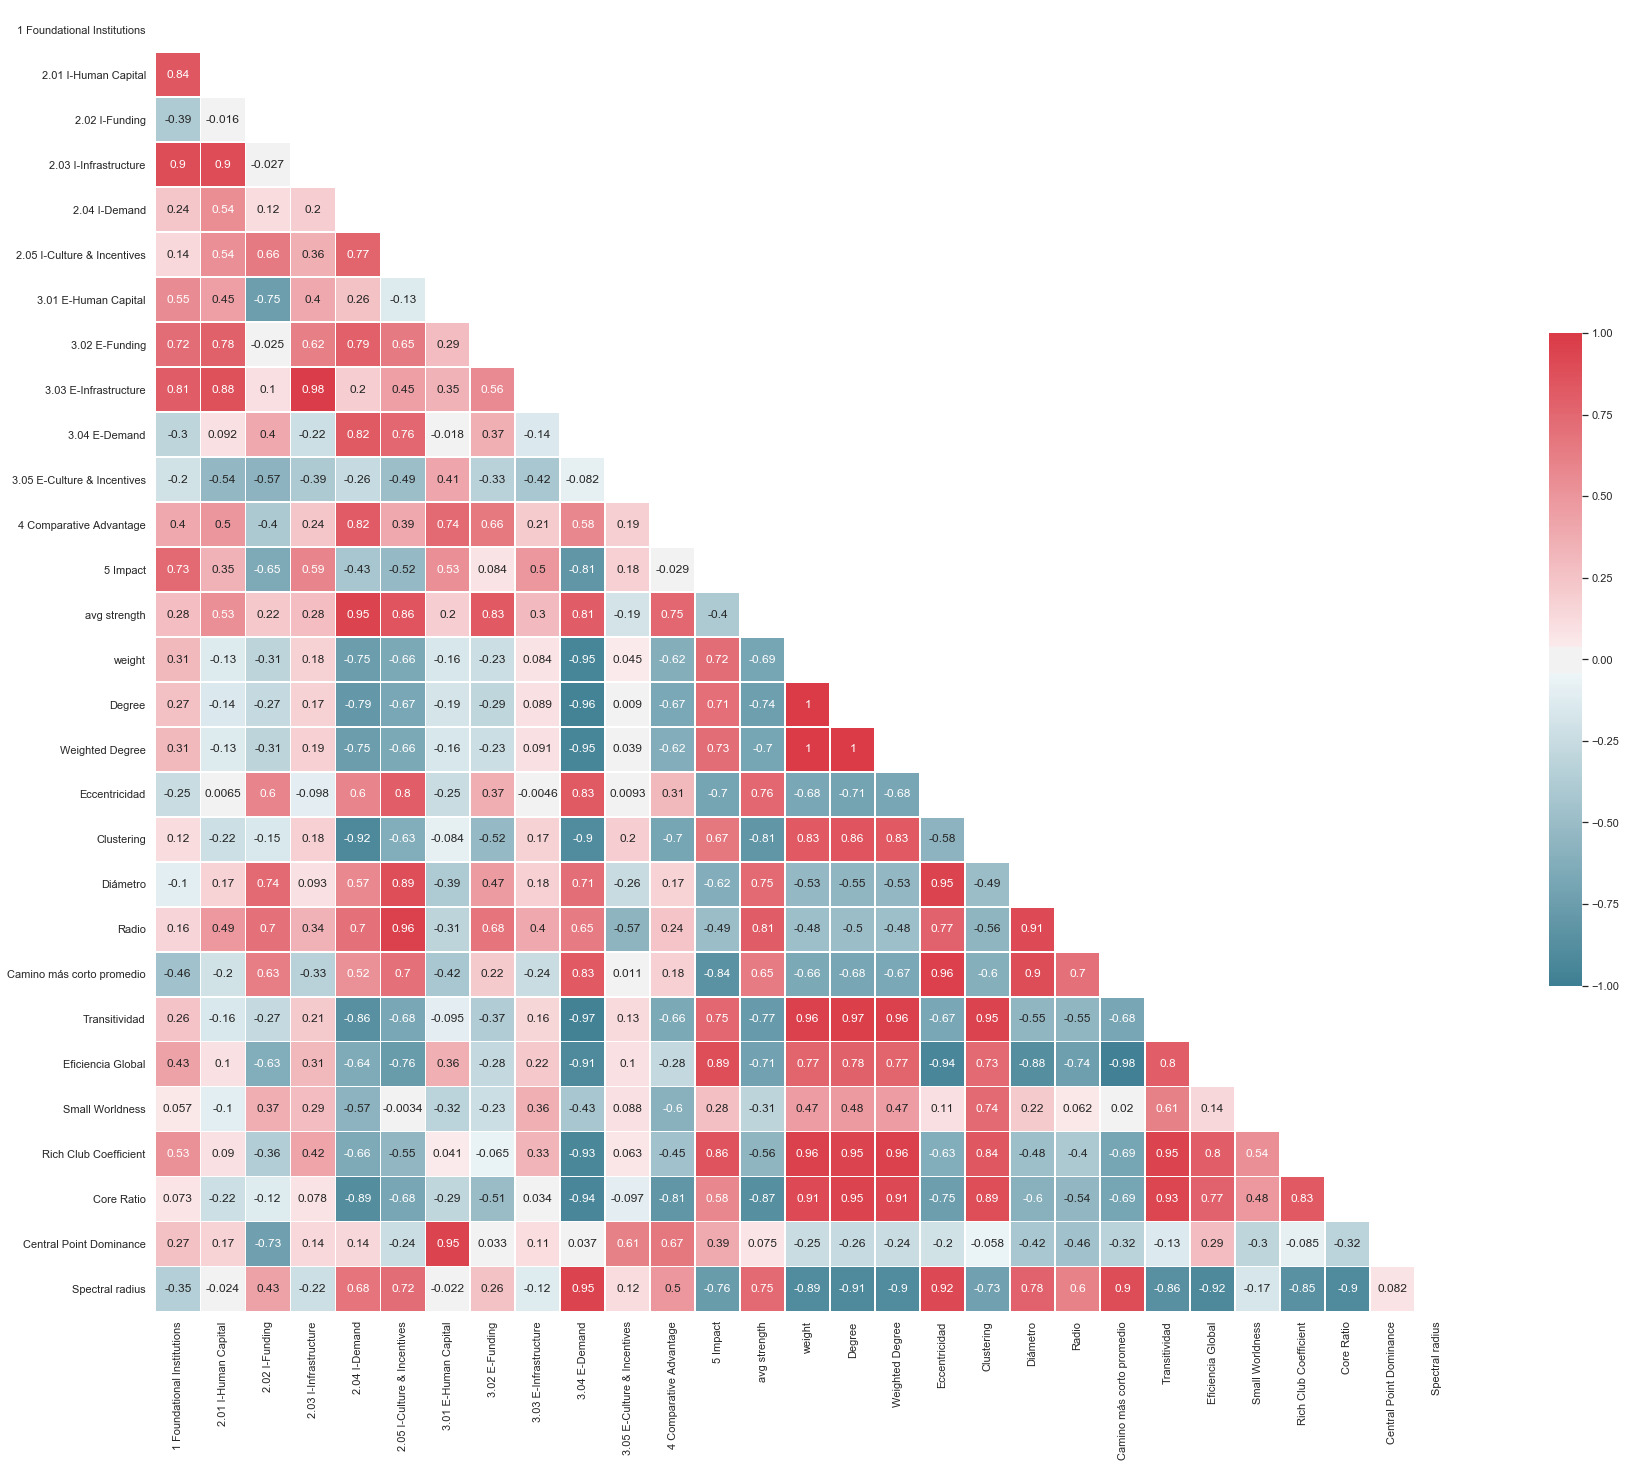

In [47]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(ieco_global_corr_df, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(32, 24))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ieco_global_corr_df, mask=mask, cmap=cmap, annot=True, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
iecosystems_m=['1 Foundational Institutions', '2.01 I-Human Capital', '2.02 I-Funding', '2.03 I-Infrastructure', '2.04 I-Demand',
      '2.05 I-Culture & Incentives', '3.01 E-Human Capital', '3.02 E-Funding', '3.03 E-Infrastructure', '3.04 E-Demand', 
      '3.05 E-Culture & Incentives', '4 Comparative Advantage', '5 Impact']

global_m=['avg strength', 'weight', 'Degree', 'Weighted Degree', 'Eccentricidad', 'Clustering',
          'Diámetro', 'Radio', 'Camino más corto promedio', 'Transitividad', 'Eficiencia Global', 
          'Small Worldness', 'Rich Club Coefficient', 'Core Ratio', 'Central Point Dominance', 'Spectral radius']

significant_pairs=[]
for a in iecosystems_m:
    for b in global_m:
        if check_corr_significance(df_graph_ieco, df_graph_ieco, a, b)[0]:
            significant_pairs.append((a,b))

significant_pairs


[('2.04 I-Demand', 'avg strength'),
 ('2.04 I-Demand', 'Clustering'),
 ('2.04 I-Demand', 'Transitividad'),
 ('2.04 I-Demand', 'Core Ratio'),
 ('2.05 I-Culture & Incentives', 'avg strength'),
 ('2.05 I-Culture & Incentives', 'Diámetro'),
 ('2.05 I-Culture & Incentives', 'Radio'),
 ('3.01 E-Human Capital', 'Central Point Dominance'),
 ('3.02 E-Funding', 'avg strength'),
 ('3.04 E-Demand', 'weight'),
 ('3.04 E-Demand', 'Degree'),
 ('3.04 E-Demand', 'Weighted Degree'),
 ('3.04 E-Demand', 'Eccentricidad'),
 ('3.04 E-Demand', 'Clustering'),
 ('3.04 E-Demand', 'Camino más corto promedio'),
 ('3.04 E-Demand', 'Transitividad'),
 ('3.04 E-Demand', 'Eficiencia Global'),
 ('3.04 E-Demand', 'Rich Club Coefficient'),
 ('3.04 E-Demand', 'Core Ratio'),
 ('3.04 E-Demand', 'Spectral radius'),
 ('5 Impact', 'Camino más corto promedio'),
 ('5 Impact', 'Eficiencia Global'),
 ('5 Impact', 'Rich Club Coefficient')]

In [49]:
df_graph_ieco_with_detail = pd.concat([df_imputed,Graph_df], axis = 1)
df_graph_ieco_with_detail

,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),1.10 Corruption Perceptions Index (TI),2.01a Percentage of adults with a doctoral or equivalent level of education (OECD),2.01b Skillset of graduates (GCI 4.0),2.01c Ease of finding skilled employees (GCI 4.0),2.01d Researchers/Professionals engaged in R&D per million population (GII),"2.01e STEM Graduates per capita (OECD) - Natural sciences, mathematics and statistics",2.02a R&D expenditure as a % GDP (UNESCO),2.02b R&D expenditure in '000 current PPP$ (UNESCO),2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO),2.02d Business Expenditure as % of total R&D expenditure (UNESCO),2.03a ICT Adoption (GCI 4.0),2.03b Production Process Sophistication (GCI),2.03c Availability of latest technologies (GCI),2.03d ICT access (GII),2.04a Government procurement of advanced technology (GCI),2.04b University-industry research collaborations (GII),"2.04c Trade, Competition & Market scale (GII)",2.05a Research institutions prominence (GCI 4.0),2.05b Graduates in science & engineering (%) (GII),3.01a Entrepreneurship perceived capabilities (GEM),3.01b % school grads in tertiary education (GII),3.02a VC investment,3.02b Financing of SME's (GCI 4.0),3.02c Venture Capital Availability (GCI 4.0),3.02d Ease of Credit (GII),3.02e VC deals (GII),3.02f Venture Capital Deal Volume,3.03a Logistics performance (World Bank),3.03b Electricity (GCI),3.03c ICT Adoption (GCI),3.03d Number of internet users (UN),3.04a Buyer sophistication (GCI 4.0),3.04b Domestic Market Scale (GII),3.05a Entrepreneurial intentions (GEM),3.05b Fear of failure (GEM),3.05c Entrepreneurship as a Good Career choice (GEM),3.05d High Status to Successful Entrepreneurs (GEM),3.05e Business Freedom (Heritage Foundation),3.05f Attitudes towards Entrepreneurial Risk (GCI 4.0),4.01 State of cluster development (GCI 4.0),4.02 Country capacity to attract and retain talent,5.01 GDP per capita,5.02 Social Progress Index,5.03 Inclusive Development Index,5.04 Population below international poverty line (SDG 1 - No poverty),5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger),5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth),5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),"5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)",5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities),5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities),5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production),avg strength,weight,Degree,Weighted Degree,Eccentricidad,Clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius
México,3.90,4.44,3.63,3.81,3.68,3.33,2.47,3.34,4.50,2.12,1.000000,3.06,3.12,1.11,3.100000,1.41,1.09,2.58,1.16,3.20,3.20,3.67,3.20,2.40,2.75,4.18,2.19,2.84,4.04,2.19,1.52,2.82,2.53,4.6,1.04,1.29,3.08,4.82,3.20,3.41,2.76,4.10,1.78,2.21,3.49,3.62,3.68,3.04,3.19,2.67,1.46,3.82,3.08,4.80,4.88,3.34,4.72,4.33,4.520000,4.32,1.71,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940,7,4,3.820318,0.050000,0.289320,0.677149,1.000000,0.421405,0.202,1.910
Argentina,3.36,4.22,2.97,2.60,3.30,3.02,2.99,2.86,3.77,2.60,1.343333,3.12,3.12,1.59,1.000000,1.45,1.04,3.33,1.14,3.32,2.87,3.13,3.92,2.20,2.50,3.45,1.79,1.80,2.34,3.81,1.08,2.08,1.88,3.2,1.08,1.02,2.93,4.79,3.32,3.81,2.66,3.69,1.67,4.06,2.99,2.63,3.41,3.03,2.63,2.53,1.55,4.07,3.09,4.97,4.88,3.58,3.94,4.20,4.580000,4.71,2.03,3.244633,1.481579,

In [60]:
i_funding_components = ['2.02a R&D expenditure as a % GDP (UNESCO)',
                       '2.02b R&D expenditure in \'000 current PPP$ (UNESCO)',
                       '2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO)',
                       '2.02d Business Expenditure as % of total R&D expenditure (UNESCO)']

e_funding_components = ['3.02a VC investment',
                       '3.02b Financing of SME\'s (GCI 4.0)',
                       '3.02c Venture Capital Availability (GCI 4.0)',
                       '3.02d Ease of Credit (GII)',
                       '3.02e VC deals (GII)',
                       '3.02f Venture Capital Deal Volume']

comparative_advantage_components = ['4.01 State of cluster development (GCI 4.0)',
                                   '4.02 Country capacity to attract and retain talent']

impact_components = ['5.01 GDP per capita',
                    '5.02 Social Progress Index',
                    '5.03 Inclusive Development Index',
                    '5.04 Population below international poverty line (SDG 1 - No poverty)',
                    '5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)',
                    '5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)',
                    '5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities)',
                    '5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities)',
                    '5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)']

collab_metrics = Graph_df.columns.values.tolist()
collab_metrics = collab_metrics[-6:]
collab_metrics.append('Clustering')


Correlation between:  2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO)   and   4.02 Country capacity to attract and retain talent
**********************************************
Pearson Correlation: -0.8342792629575504, p-value: 0.03891941967585397
*Statistically significant*
**********************************************



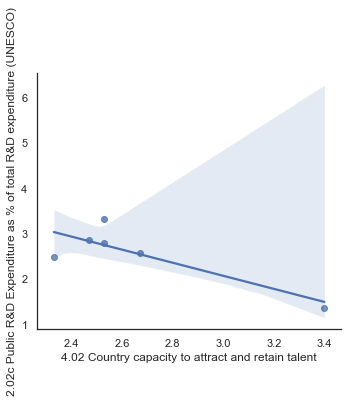

In [75]:
# ---
# correlations between I Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    


Correlation between:  3.02f Venture Capital Deal Volume   and   4.01 State of cluster development (GCI 4.0)
**********************************************
Pearson Correlation: 0.8757109559728257, p-value: 0.022211655634626636
*Statistically significant*
**********************************************



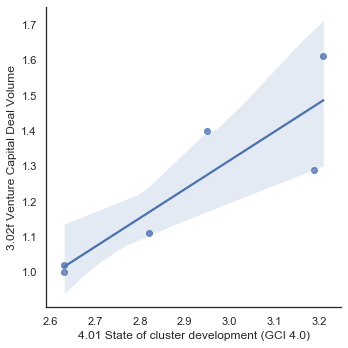

In [72]:
# ---
# correlations between E Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))


for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)


Correlation between:  2.02d Business Expenditure as % of total R&D expenditure (UNESCO)   and   5.01 GDP per capita
**********************************************
Pearson Correlation: 0.894202033885782, p-value: 0.016197705044079205
*Statistically significant*
**********************************************


Correlation between:  2.02a R&D expenditure as a % GDP (UNESCO)   and   5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)
**********************************************
Pearson Correlation: -0.8647985523990074, p-value: 0.02618344435454628
*Statistically significant*
**********************************************


Correlation between:  2.02b R&D expenditure in '000 current PPP$ (UNESCO)   and   5.04 Population below international poverty line (SDG 1 - No poverty)
**********************************************
Pearson Correlation: -0.8665162341644641, p-value: 0.025537672366187335
*Statistically significant*
******************

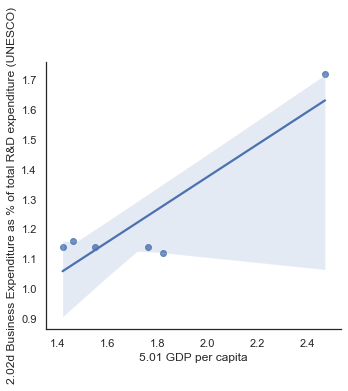

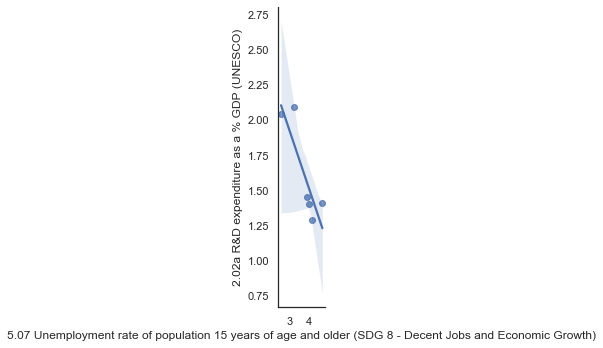

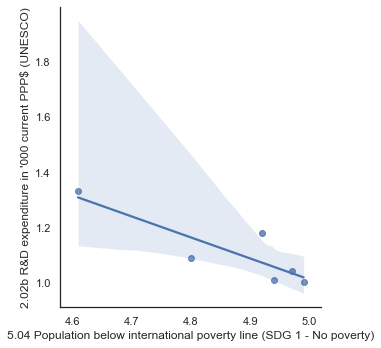

In [71]:
# ---
# correlations between I Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)


Correlation between:  3.02e VC deals (GII)   and   5.01 GDP per capita
**********************************************
Pearson Correlation: 0.9802071021402058, p-value: 0.0005837611875190382
*Statistically significant*
**********************************************


Correlation between:  3.02e VC deals (GII)   and   5.02 Social Progress Index
**********************************************
Pearson Correlation: 0.9109359390115407, p-value: 0.011545364251009507
*Statistically significant*
**********************************************



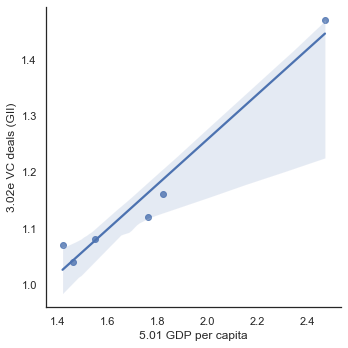

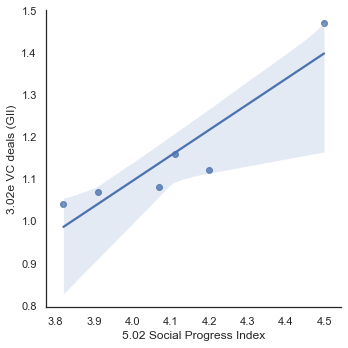

In [73]:
# ---
# correlations between E Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)


Correlation between:  Eficiencia Global   and   5.04 Population below international poverty line (SDG 1 - No poverty)
**********************************************
Pearson Correlation: 0.8524436013503677, p-value: 0.031052971497648834
*Statistically significant*
**********************************************


Correlation between:  Small Worldness   and   5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)
**********************************************
Pearson Correlation: 0.8859378118403944, p-value: 0.0187732891942125
*Statistically significant*
**********************************************


Correlation between:  Small Worldness   and   5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities)
**********************************************
Pearson Correlation: 0.8553577966358992, p-value: 0.0298689941813307
*Statistically significant*
*****************************

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()



Correlation between:  Spectral radius   and   5.04 Population below international poverty line (SDG 1 - No poverty)
**********************************************
Pearson Correlation: -0.8119826021894627, p-value: 0.04970255437148583
*Statistically significant*
**********************************************



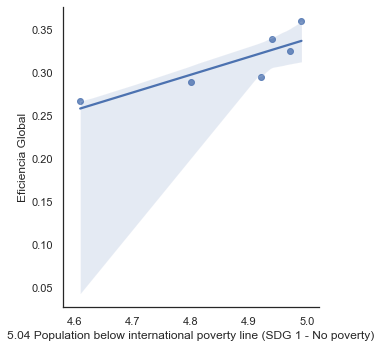

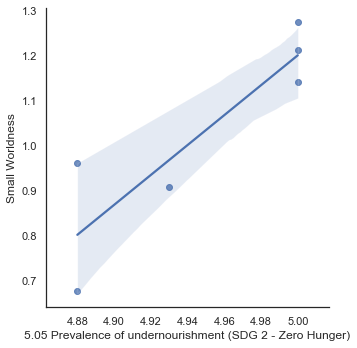

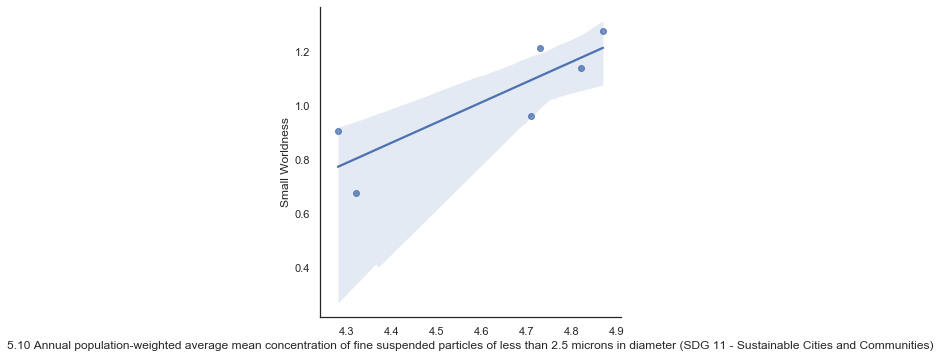

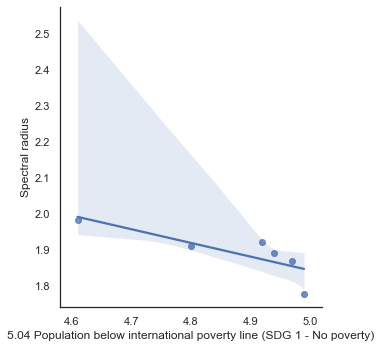

In [74]:
# ---
# correlations between Colaboration and Impact
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)


Correlation between:  Central Point Dominance   and   4.02 Country capacity to attract and retain talent
**********************************************
Pearson Correlation: 0.9613312789908512, p-value: 0.002213994887793402
*Statistically significant*
**********************************************


Correlation between:  Clustering   and   4.01 State of cluster development (GCI 4.0)
**********************************************
Pearson Correlation: -0.8144599256630701, p-value: 0.04844405919111323
*Statistically significant*
**********************************************



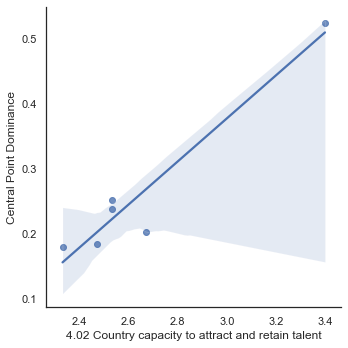

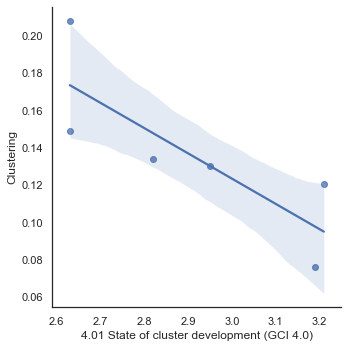

In [76]:
# ---
# correlations between Colaboration and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)